# Handling sidwall core data

This notebooks looks at the main `striplog` object. For the basic objects it depends on, see [Basic objects](./Basic_objects.ipynb).

First, import anything we might need.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import striplog
striplog.__version__

'0.7.0'

In [2]:
from striplog import Legend, Lexicon, Interval, Component

In [3]:
legend = Legend.builtin('NSDOE')
lexicon = Lexicon.default()

<hr />
## Making a `striplog`

In [4]:
from striplog import Striplog
imgfile = "data/images/M-MG-70_14.3_135.9.png"

In [5]:
strip = Striplog.from_image(imgfile, 14.3, 135.9, legend=legend)
strip

Striplog(26 Intervals, start=14.3, stop=135.9)

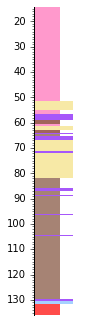

In [6]:
strip.plot(legend, ladder=True, aspect=3)

<hr />
## Handling point data

Some things really are point data. Sort of like a log, but irregular, more discrete. Here are some lab measurements... 

In [7]:
data_csv = """top, density, porosity, remarks, comp lithology, comp colour
30, 2300, 6.4,, sand,green
40, 2375, 7.3,, shale, grey
60, 2400, 8.2, broken sample,,
70, 2425, 9.2,, sand, 
80, 2575, 4.3,, shale,
90, 2600, 2.2,, sand, red
93, 2230, 2.1,, sand, 
"""

In [8]:
point_data = Striplog.from_csv(text=data_csv, points=True)

In [9]:
point_data[1]

Interval({'description': '', 'top': Position({'middle': 40.0, 'units': 'm'}), 'components': [Component({'lithology': 'shale', 'colour': 'grey'})], 'base': Position({'middle': 40.0, 'units': 'm'}), 'data': {'density': 2375.0, 'porosity': 7.3, 'remarks': ''}})

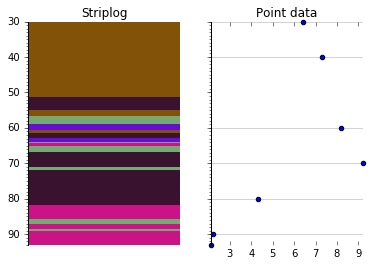

In [10]:
fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
ax0 = strip.plot(ax=ax0)
ax1 = point_data.plot(field='porosity', ax=ax1)

ax0.set_title('Striplog')
ax1.set_title('Point data')

plt.show()

In [11]:
s = strip.union(point_data)

In [12]:
s[0]

Interval({'description': '100.0% 100.0% 36.94 m of anhydrite with 0.0% 0.00 m of sand, green with 0.0% 0.00 m of shale, grey', 'top': Position({'middle': 14.3, 'units': 'm'}), 'components': [Component({'lithology': 'anhydrite', 'colour': '', 'grainsize': ''}), Component({'lithology': 'sand', 'colour': 'green'}), Component({'lithology': 'shale', 'colour': 'grey'})], 'base': Position({'middle': 51.24117647058824, 'units': 'm'}), 'data': {'density': [2300.0, 2375.0], 'porosity': [6.4, 7.3], 'remarks': ['', '']}})